# Loading Dataset

In [1]:
# Importing librosa

# !pip install librosa

# !pip install IPython


In [2]:
!python --version

Python 3.8.5


In [3]:
!pip install pip

In [4]:
!pip install -U librosa

  Using cached librosa-0.10.0-py3-none-any.whl (252 kB)
  Using cached soxr-0.3.3-cp38-cp38-win_amd64.whl (176 kB)
  Using cached numpy-1.24.2-cp38-cp38-win_amd64.whl (14.9 MB)

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.19.2.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:


In [5]:
# import sys
# !{sys.executable} -m pip install librosa

In [6]:
import librosa

In [7]:
import soundfile
import librosa
import numpy as np
from IPython.display import Audio

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

In [8]:
!pip install soundfile

Mounting google drive

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
import os

paths = []
labels = []

for dirpath, dirname, filenames in os.walk('E:\SUBESCO'):
  # print("Dirpath: ", dirpath)
  # print('Dirname: ', dirname)
  # print('Filename: ', filenames)
  #print(len(filename))
  for filename in filenames:
    paths.append(os.path.join(dirpath, filename))
    # print(os.path.join(dirpath, filename))
    label = filename.split('_')
    # print(filename)
    # print(label)

    label = label[-2]
    # print(label.lower())
    labels.append(label.lower())

print("Dataset loaded.")

Dataset loaded.


In [11]:
print(paths[:10])
print(labels[:10])

['E:\\SUBESCO\\F_01_OISHI_S_10_ANGRY_1.wav', 'E:\\SUBESCO\\F_01_OISHI_S_10_ANGRY_2.wav', 'E:\\SUBESCO\\F_01_OISHI_S_10_ANGRY_3.wav', 'E:\\SUBESCO\\F_01_OISHI_S_10_ANGRY_4.wav', 'E:\\SUBESCO\\F_01_OISHI_S_10_ANGRY_5.wav', 'E:\\SUBESCO\\F_01_OISHI_S_10_DISGUST_1.wav', 'E:\\SUBESCO\\F_01_OISHI_S_10_DISGUST_2.wav', 'E:\\SUBESCO\\F_01_OISHI_S_10_DISGUST_3.wav', 'E:\\SUBESCO\\F_01_OISHI_S_10_DISGUST_4.wav', 'E:\\SUBESCO\\F_01_OISHI_S_10_DISGUST_5.wav']
['angry', 'angry', 'angry', 'angry', 'angry', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust']


In [12]:
paths[:10]

['E:\\SUBESCO\\F_01_OISHI_S_10_ANGRY_1.wav',
 'E:\\SUBESCO\\F_01_OISHI_S_10_ANGRY_2.wav',
 'E:\\SUBESCO\\F_01_OISHI_S_10_ANGRY_3.wav',
 'E:\\SUBESCO\\F_01_OISHI_S_10_ANGRY_4.wav',
 'E:\\SUBESCO\\F_01_OISHI_S_10_ANGRY_5.wav',
 'E:\\SUBESCO\\F_01_OISHI_S_10_DISGUST_1.wav',
 'E:\\SUBESCO\\F_01_OISHI_S_10_DISGUST_2.wav',
 'E:\\SUBESCO\\F_01_OISHI_S_10_DISGUST_3.wav',
 'E:\\SUBESCO\\F_01_OISHI_S_10_DISGUST_4.wav',
 'E:\\SUBESCO\\F_01_OISHI_S_10_DISGUST_5.wav']

In [13]:
print(labels[:10])

['angry', 'angry', 'angry', 'angry', 'angry', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust']


# Creating DataFrame

In [14]:
import pandas as pd

df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

df

,speech,label
0,E:\SUBESCO\F_01_OISHI_S_10_ANGRY_1.wav,angry
1,E:\SUBESCO\F_01_OISHI_S_10_ANGRY_2.wav,angry
2,E:\SUBESCO\F_01_OISHI_S_10_ANGRY_3.wav,angry
3,E:\SUBESCO\F_01_OISHI_S_10_ANGRY_4.wav,angry
4,E:\SUBESCO\F_01_OISHI_S_10_ANGRY_5.wav,angry
...,...,...
6995,E:\SUBESCO\M_10_EVAN_S_9_SURPRISE_1.wav,surprise
6996,E:\SUBESCO\M_10_EVAN_S_9_SURPRISE_2.wav,surprise
6997,E:\SUBESCO\M_10_EVAN_S_9_SURPRISE_3.wav,surprise
6998,E:\SUBESCO\M_10_EVAN_S_9_SURPRISE_4.wav,surprise


In [15]:
df['label'].value_counts()

sad         1000
surprise    1000
disgust     1000
fear        1000
neutral     1000
angry       1000
happy       1000
Name: label, dtype: int64

In [16]:
import IPython.display as ipd

# Visualization of audio

In [17]:
ipd.Audio(paths[0])

In [18]:
print(df['speech'][0])

E:\SUBESCO\F_01_OISHI_S_10_ANGRY_1.wav


In [19]:
ipd.Audio(df['speech'][0])

# Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

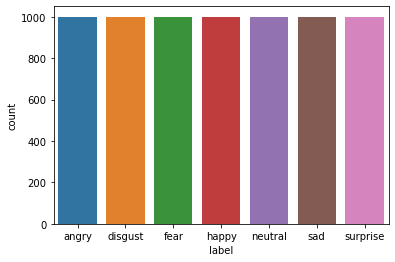

In [20]:
import seaborn as sns

sns.countplot(df['label'])

# Feature Extraction

In [21]:
# for i in range(len(df)):
#   print(df['speech'])

In [22]:
# print(df.apply(lambda row: row['speech']), axis=1)

In [23]:
# for index, row in df.iterrows():
#   print(row['speech'], row['label'])

In [24]:
# def extract_feature(file_name, mfcc, chroma, mel):
#   with soundfile.SoundFile(file_name) as sound_file:
#     X = sound_file.read(dtype='float32')
#     sample_rate = sound_file.samplerate

#     if chroma:
#       stft = np.abs(librosa.stft(X))

#     result = np.array([])
#     if mfcc:
#       mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
#       result = np.hstack((result, mfccs))

#     if chroma:
#       chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
#       result = np.hstack((result, chroma))

#     if mel:
#       mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
#       result = np.hstack((result, mel))

#     return result

Note: 
Extracted features are:
  1. Mel-Frequency Cepstrum Coefficients (MFCC)
  2. Chroma
  3. Melspectrogram

# TODO:
Apply other feature extraction technique.

In [25]:
def extract_feature(file_name, mfcc, chroma, mel):
  # with soundfile.SoundFile(file_name) as sound_file:
  # X = sound_file.read(dtype='float32')
  # sample_rate = sound_file.samplerate
  X, sample_rate = librosa.load(file_name)

  # print(X, sample_rate)

  if chroma:
    stft = np.abs(librosa.stft(X))

  result = np.array([])
  if mfcc:
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfccs))

  if chroma:
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma))

  if mel:
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

  return result

In [26]:
# x = extract_feature(df['speech'][0], mfcc=True, chroma=True, mel=True) # extract feature is working correctly

# Allowed emotions

In [27]:
# emotions = ['happy']

In [28]:
# emotions

Extract feature

In [29]:
X, y = [], []

for index, row in df.iterrows():
  emotion = row['label']

  # if emotion in emotions:
  X.append(extract_feature(row['speech'], mfcc=True, chroma=True, mel=True))
  y.append(row['label'])
  
  # print(type(row['speech']))
  #print(row['speech'])
  #print(row['label'])

In [30]:
print(y)

['angry', 'angry', 'angry', 'angry', 'angry', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'fear', 'fear', 'happy', 'happy', 'happy', 'happy', 'happy', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sad', 'sad', 'sad', 'sad', 'sad', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'angry', 'angry', 'angry', 'angry', 'angry', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'fear', 'fear', 'happy', 'happy', 'happy', 'happy', 'happy', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sad', 'sad', 'sad', 'sad', 'sad', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'angry', 'angry', 'angry', 'angry', 'angry', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'fear', 'fear', 'happy', 'happy', 'happy', 'happy', 'happy', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sad', 'sad', 'sad', 'sad', 'sad', 'surprise', 'surprise', 'surprise', 'surprise', 'surpr

# Splitting dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.25, random_state=9)

In [32]:
X_train

array([[-2.31112061e+02,  7.10231323e+01,  2.78649360e-01, ...,
         1.62687283e-02,  1.47621974e-03,  2.23135521e-05],
       [-3.24608704e+02,  6.56044312e+01,  1.00770760e+00, ...,
         5.40947891e-04,  4.32078668e-05,  6.55437475e-07],
       [-3.30617401e+02,  4.09524803e+01, -1.01563942e+00, ...,
         8.34929198e-03,  7.20729586e-04,  1.28059673e-05],
       ...,
       [-3.71420227e+02,  6.38274841e+01,  1.82819080e+01, ...,
         7.92999379e-03,  5.07682562e-04,  8.34846833e-06],
       [-2.57054901e+02,  2.89862385e+01, -1.78267479e+01, ...,
         1.49590503e-02,  1.10295089e-03,  1.55685466e-05],
       [-3.27287445e+02,  6.19906387e+01, -1.30167007e+00, ...,
         6.53851093e-05,  5.77611490e-06,  6.35228119e-08]])

In [33]:
X_test

array([[-3.55722198e+02,  6.15984650e+01, -8.47567558e+00, ...,
         1.49227388e-04,  1.28249567e-05,  1.81155073e-07],
       [-3.28314545e+02,  5.98434563e+01,  4.63226652e+00, ...,
         1.93623558e-03,  1.31533394e-04,  2.56535645e-06],
       [-2.81479034e+02,  6.44787140e+01,  1.20502453e+01, ...,
         3.80146853e-03,  2.01341492e-04,  2.27759392e-06],
       ...,
       [-3.34700806e+02,  3.67955666e+01,  3.92791009e+00, ...,
         1.11221569e-02,  9.92993708e-04,  1.66668087e-05],
       [-3.69332489e+02,  3.92144394e+01, -5.54126120e+00, ...,
         7.49555475e-04,  8.33143058e-05,  1.13163287e-06],
       [-2.94360168e+02,  3.65528336e+01, -5.41536665e+00, ...,
         1.53740970e-02,  1.31280185e-03,  1.94201839e-05]])

In [34]:
y_train

['sad',
 'fear',
 'disgust',
 'disgust',
 'surprise',
 'angry',
 'disgust',
 'disgust',
 'sad',
 'disgust',
 'disgust',
 'disgust',
 'happy',
 'angry',
 'neutral',
 'angry',
 'angry',
 'disgust',
 'happy',
 'fear',
 'angry',
 'angry',
 'surprise',
 'surprise',
 'happy',
 'neutral',
 'fear',
 'disgust',
 'angry',
 'fear',
 'neutral',
 'surprise',
 'angry',
 'disgust',
 'disgust',
 'angry',
 'surprise',
 'angry',
 'sad',
 'sad',
 'disgust',
 'angry',
 'disgust',
 'fear',
 'fear',
 'disgust',
 'surprise',
 'angry',
 'fear',
 'surprise',
 'neutral',
 'surprise',
 'neutral',
 'fear',
 'neutral',
 'happy',
 'happy',
 'happy',
 'surprise',
 'angry',
 'happy',
 'angry',
 'disgust',
 'surprise',
 'disgust',
 'sad',
 'happy',
 'surprise',
 'surprise',
 'neutral',
 'neutral',
 'disgust',
 'sad',
 'angry',
 'surprise',
 'fear',
 'neutral',
 'sad',
 'neutral',
 'surprise',
 'surprise',
 'sad',
 'angry',
 'fear',
 'fear',
 'disgust',
 'neutral',
 'happy',
 'angry',
 'surprise',
 'disgust',
 'happy',

In [35]:
print(type(y_test))

<class 'list'>


In [36]:

y_test

['happy',
 'sad',
 'surprise',
 'happy',
 'fear',
 'angry',
 'neutral',
 'angry',
 'angry',
 'happy',
 'happy',
 'disgust',
 'sad',
 'happy',
 'sad',
 'surprise',
 'fear',
 'angry',
 'disgust',
 'sad',
 'surprise',
 'sad',
 'disgust',
 'sad',
 'sad',
 'neutral',
 'surprise',
 'happy',
 'fear',
 'fear',
 'disgust',
 'disgust',
 'fear',
 'happy',
 'disgust',
 'fear',
 'fear',
 'angry',
 'fear',
 'neutral',
 'angry',
 'neutral',
 'disgust',
 'happy',
 'surprise',
 'fear',
 'neutral',
 'happy',
 'happy',
 'angry',
 'fear',
 'neutral',
 'sad',
 'surprise',
 'angry',
 'angry',
 'sad',
 'happy',
 'fear',
 'surprise',
 'happy',
 'disgust',
 'sad',
 'neutral',
 'disgust',
 'sad',
 'surprise',
 'neutral',
 'disgust',
 'happy',
 'neutral',
 'neutral',
 'surprise',
 'sad',
 'surprise',
 'disgust',
 'neutral',
 'angry',
 'neutral',
 'surprise',
 'surprise',
 'disgust',
 'surprise',
 'happy',
 'fear',
 'disgust',
 'neutral',
 'sad',
 'angry',
 'disgust',
 'fear',
 'surprise',
 'disgust',
 'fear',
 '

In [37]:
type(X_train)

numpy.ndarray

In [38]:
# Get shape of training and testing datasets

print((X_train.shape[0], X_test.shape[0]))

(5250, 1750)


In [39]:
# Get the number of features extracted

print(f'Features extracted: {X_train.shape[1]}')

Features extracted: 180


# Classifier

In [40]:
# Initialize the Multi-layer Perceptron Classifier

model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [41]:
model.fit(X_train, y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

# Predict the test set

In [42]:
y_predict = model.predict(X_test)

#y_predict

In [43]:
y_predict

array(['happy', 'fear', 'surprise', ..., 'fear', 'happy', 'disgust'],
      dtype='<U8')

# Accuracy of the model

In [44]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_predict)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.06%


In [45]:
f1_score(y_test, y_predict, average=None)

array([0.8042328 , 0.66520788, 0.86060606, 0.74730022, 0.87578947,
       0.77735849, 0.7251462 ])

In [46]:
import pandas as pd

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df.head(20)

,Actual,Predicted
0,happy,happy
1,sad,fear
2,surprise,surprise
3,happy,happy
4,fear,fear
5,angry,angry
6,neutral,happy
7,angry,angry
8,angry,disgust
9,happy,surprise


# Saving the model

In [47]:
# import pickle

# with open('modelForPrediction.sav', 'wb')
import pickle
# Writing different model files to file
with open( 'modelForPrediction1.sav', 'wb') as f:
    pickle.dump(model,f)
    

In [49]:
filename = 'modelForPrediction1.sav'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_feature("E:\SUBESCO\F_01_OISHI_S_10_ANGRY_1.wav", mfcc=True, chroma=True, mel=True)

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)
prediction

array(['angry'], dtype='<U8')